# HR Analytics Project- Understanding the Attrition in HR<br><br>
**Problem Statement:**<br><br>
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?<br><br>

**HR Analytics**<br>

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.<br><br>

**Attrition in HR**<br>

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.<br>

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
<br><br>
**Attrition affecting Companies**<br>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.
<br><br>In this problem, we are using machine learning algorithms to understand Attrition in HR.<br><br>



 

### Importing required libraries


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ibm-hr-analytics-employee-attrition-performance (1).zip to ibm-hr-analytics-employee-attrition-performance (1) (1).zip


In [ ]:
df=pd.read_csv("ibm-hr-analytics-employee-attrition-performance (1).zip")

### Exploratory Data Analysis

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


This shows the first five rows of the dataset.

In [ ]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns in the dataset.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

In [ ]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that there are no null values in the dataset.

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can see the statistical description of the data here.

<br>**Skewness**

* If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.

* And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.<br><br><br>--->Types of Skewness<br><br>*Positive skewness*: In simple words, if the skewness is greater than 0 then the distribution is positively skewed. The tail on the right side of the distribution will be longer or flatter. If the data is positively skewed than most of values will be concentrated below the average value of the data.<br><br>*Negative skewness*: If the skewness is less than 0 then the distribution is negatively skewed. For negatively skewed data, most of the values will be concentrated above the average value and tail on the left side of the distribution will be longer of flatter.<br><br>

In [ ]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

We can see that some of the columns are fairly symmetrical. Rest of them have positive skewness or negative skewness.
<br>YearsSinceLastPromotion has highest skewness followed by PerformanceRating and YearsAtCompany.<br><br>

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We can see that 237 employees left the company and 1233 are working with the company.

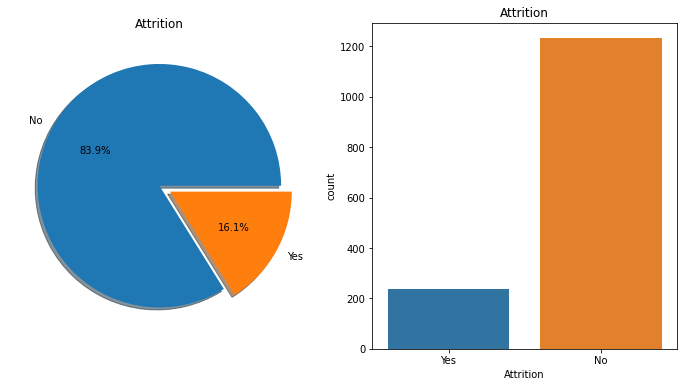

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Attrition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Attrition')
ax[0].set_ylabel('')
sns.countplot('Attrition',data=df,ax=ax[1])
ax[1].set_title('Attrition')
plt.show()

* Pie chart showing the percentage of employees who left the company and who are with the company.<br> --We can see that there is 16.1 percent attrition
<br>
* Barplot shows the number of employees  who left the company and who are with the company.

**Checking Attrition by BusinessTravel**

Text(0.5, 1.0, 'BusinessTravel vs Attrition')

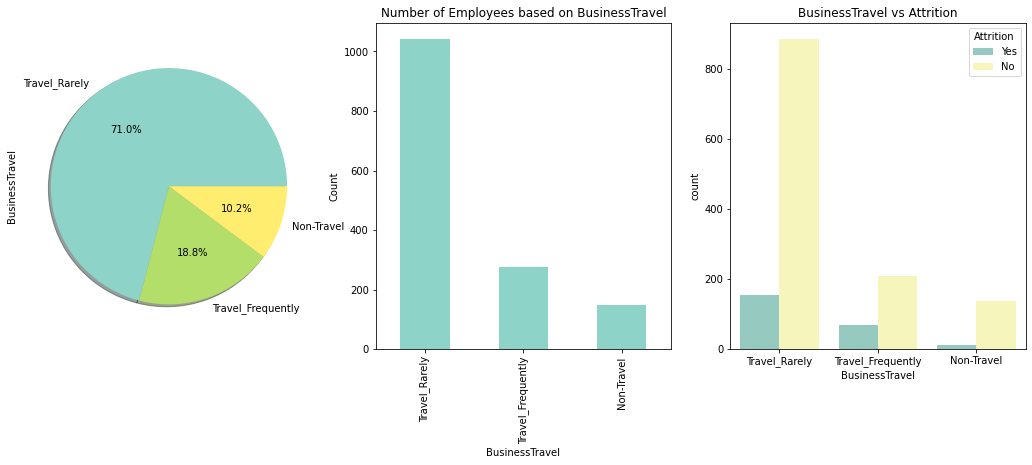

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['BusinessTravel'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Employees based on BusinessTravel')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('BusinessTravel')
sns.countplot('BusinessTravel', hue='Attrition',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('BusinessTravel vs Attrition')

From the above barplot, we can see that Attrition is high in emloyees who travel frequently.

**Checking Attrition by Department**

Text(0.5, 1.0, 'Department vs Attrition')

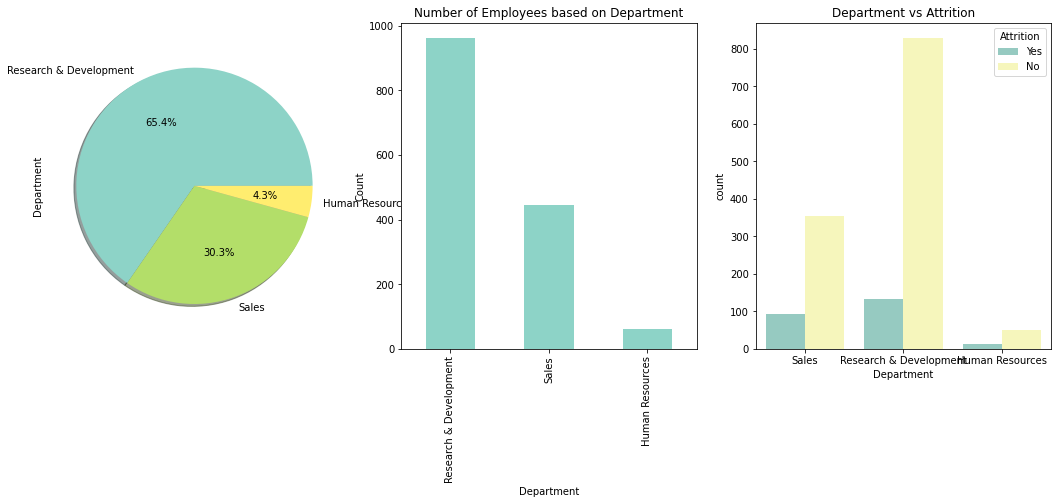

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Department'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Department'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Employees based on Department')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Department')
sns.countplot('Department', hue='Attrition',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('Department vs Attrition')

We can see that attrition is high in Human Resources Deparment

**Checking Attrition by EducationField**



Text(0.5, 1.0, 'EducationField vs Attrition')

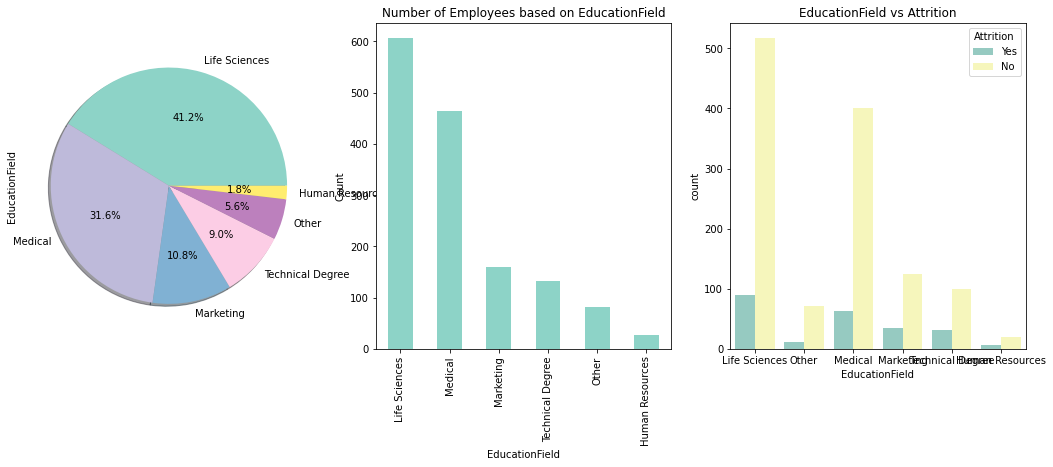

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['EducationField'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['EducationField'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Employees based on EducationField')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('EducationField')
sns.countplot('EducationField', hue='Attrition',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('EducationField vs Attrition')

We can see that the attrition is high in the HumanResources EducationField.

**Checking Attrition by Gender**


Text(0.5, 1.0, 'Gender vs Attrition')

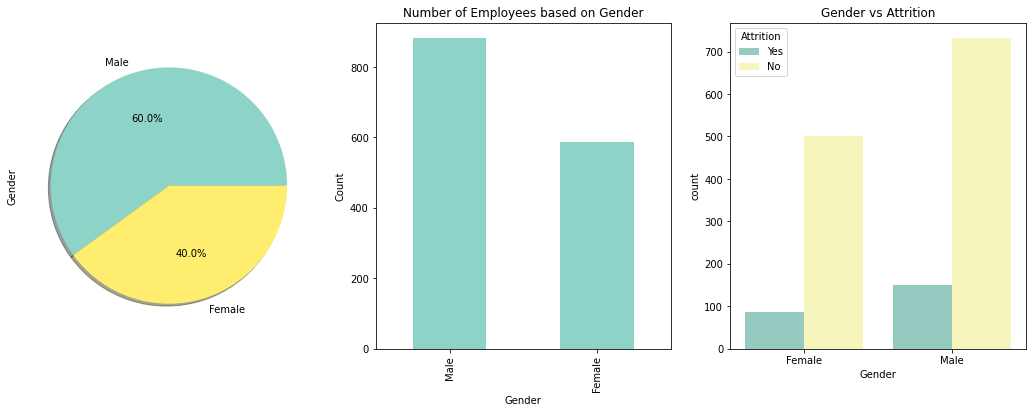

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Gender'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Employees based on Gender')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Gender')
sns.countplot('Gender', hue='Attrition',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('Gender vs Attrition')

We can see that the number of male employees are greater than female employees. The attrition percentage is almost the same in both the genders.

**Checking Attrition by MaritalStatus**


Text(0.5, 1.0, 'MaritalStatus vs Attrition')

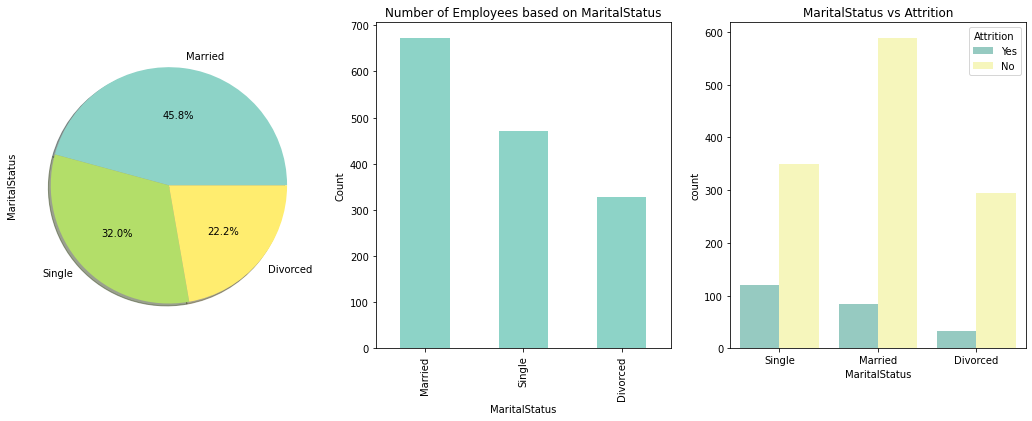

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['MaritalStatus'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Employees based on MaritalStatus')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('MaritalStatus')
sns.countplot('MaritalStatus', hue='Attrition',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('MaritalStatus vs Attrition')

We can see that the attrition rate is high in single when compared to married and divorced MaritalStatus.

**Checking Attrition by Over18**


In [ ]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

We can see that all the employees are above 18 years of age.

**Checking Attrition by OverTime**


Text(0.5, 1.0, 'OverTime vs Attrition')

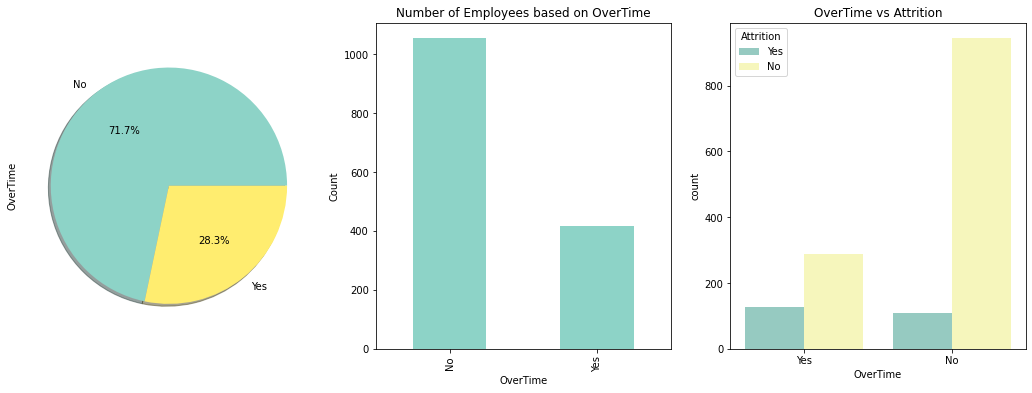

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['OverTime'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['OverTime'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Employees based on OverTime')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('OverTime')
sns.countplot('OverTime', hue='Attrition',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('OverTime vs Attrition')

We can see that there is less attrition in employees who do not prefer OverTime.

**Checking Attrition by Age**

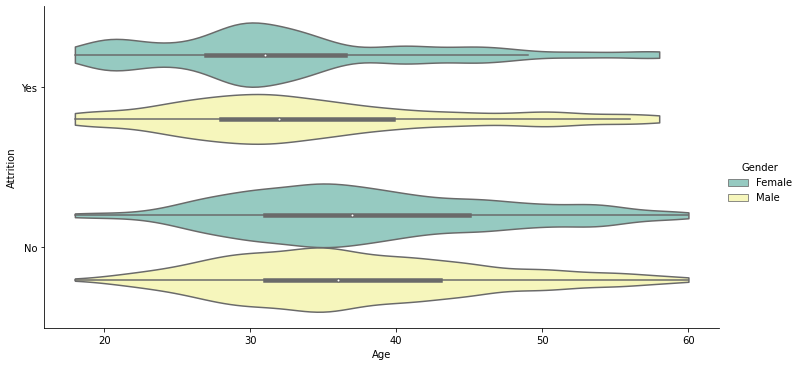

In [ ]:
sns.catplot(x="Age", y="Attrition",                 
                hue="Gender",
                data=df,
                orient="h", aspect=2, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2
                )

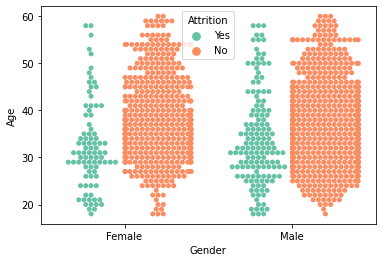

In [ ]:
sns.swarmplot("Gender","Age", hue="Attrition", data=df,split=True,palette='Set2')
plt.show()

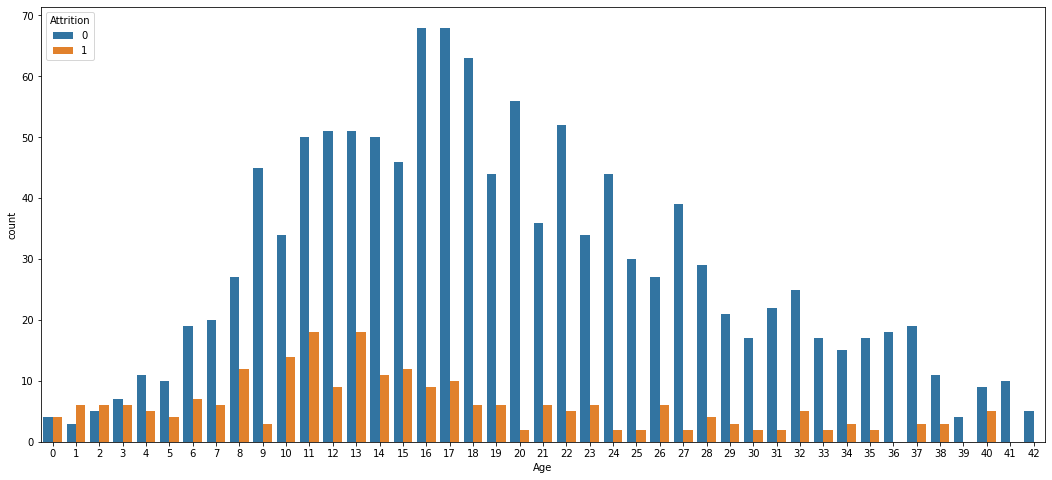

In [ ]:
plt.subplots(figsize=(18, 8))
sns.countplot(x='Age', hue= "Attrition", data=df)

**Correlation**

In [ ]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


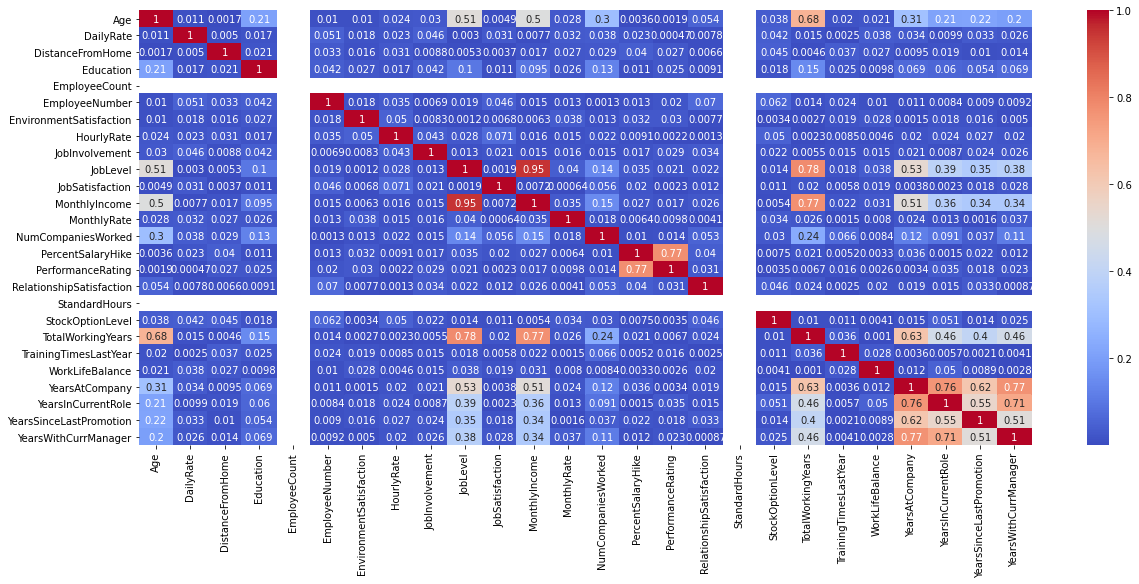

In [ ]:
data_corr = df.corr().abs()
plt.figure(figsize=(20, 8))
sns.heatmap(data_corr, annot=True,cmap='coolwarm')
plt.show()

The above heat map visualizes the correlation between the columns.

<br><br>**Dropping Columns**

From the above obseervations, dropping few columns that do not contribute much in the model.

In [ ]:
df=df.drop('EmployeeNumber', axis=1)
df=df.drop('Over18', axis=1)
df=df.drop('EmployeeCount', axis=1)
df=df.drop('StandardHours', axis=1)

**Encoding**

In [ ]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['BusinessTravel'] = labelencoder.fit_transform(df["BusinessTravel"])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df['BusinessTravel'] = labelencoder.fit_transform(df["BusinessTravel"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

### Predictive Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

<br> **Splitting data for validation**

In [ ]:
X=df.drop(['Attrition'], axis=1)
y=df['Attrition']

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)

(1029, 30) (1029,)


**-----> Checking Accuracies**

In [ ]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)


model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)

model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
prediction_svm_l = model_svm_l.predict(X_test)

model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)

model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)


In [ ]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_test))
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the Logistic Regression is 0.8752834467120182
The accuracy of the Decision Tree is  0.7868480725623582
The accuracy of the  K-Nearest Neighbours is  0.8390022675736961
The accuracy of the Linear Support Vector Machine is  0.873015873015873
The accuracy of the  Random Forest is  0.8639455782312925
The accuracy of the  Gaussian Naive Bayes is  0.7891156462585034


**-----> Checking Cross Validation Scores**

In [ ]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(model_log,X,y,cv=5)
scr2=cross_val_score(model_tree,X,y,cv=5)
scr3=cross_val_score(model_knn,X,y,cv=5)
scr4=cross_val_score(model_svm_l,X,y,cv=5)
scr5=cross_val_score(model_random,X,y,cv=5)
scr6=cross_val_score(model_gaus,X,y,cv=5)

In [ ]:
print("Cross Validation Score of Logistic Regression Model:", scr1.mean())
print("Cross Validation Score of Decision Tree Model:", scr2.mean())
print("Cross Validation Score of K-Nearest Neighbours Model:", scr3.mean())
print("Cross Validation Score of Linear Support Vector Machine Model:", scr4.mean())
print("Cross Validation Score of Random Forest Model:", scr5.mean())
print("Cross Validation Score of Gaussian Naive Bayes Model:", scr6.mean())

Cross Validation Score of Logistic Regression Model: 0.8673469387755102
Cross Validation Score of Decision Tree Model: 0.7843537414965986
Cross Validation Score of K-Nearest Neighbours Model: 0.8244897959183672
Cross Validation Score of Linear Support Vector Machine Model: 0.8693877551020408
Cross Validation Score of Random Forest Model: 0.8585034013605443
Cross Validation Score of Gaussian Naive Bayes Model: 0.7972789115646258


We can see that the difference between Accuracy and Cross Validation Score is almost the same for all the models.

<br><br> **ROC Curve**

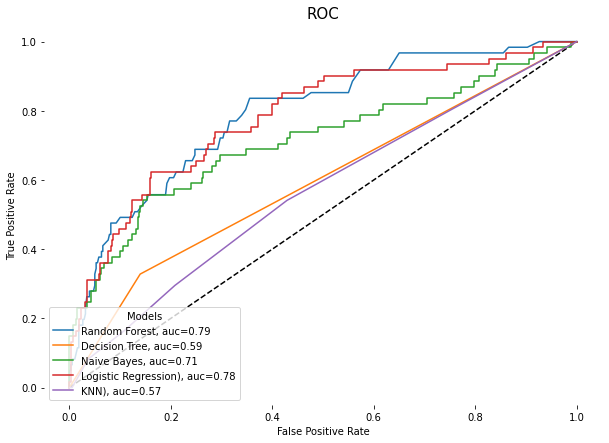

In [ ]:
y_pred_proba_RF = model_random.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = model_tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_NB = model_gaus.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_NB)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_NB)

y_pred_proba_LR = model_log.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_KNN = model_knn.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_KNN)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_KNN)



plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Naive Bayes, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Logistic Regression), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="KNN), auc="+str(round(auc5,2)))

plt.legend(loc=3, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Hyper Parameter Tuning

**Finding the best parameters for the top three models.**


<br>**--->SVM Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
model_linear = svm.SVC(kernel='linear', C=0.35, gamma=0.1)
model_linear.fit(X_train, y_train)
prediction_linear = model_linear.predict(X_test)
print('The accuracy of the Linear Support Vector Machine Model is ', metrics.accuracy_score(prediction_linear, y_test))

The accuracy of the Linear Support Vector Machine Model is  0.8798185941043084


<br> **--->KNN Model**

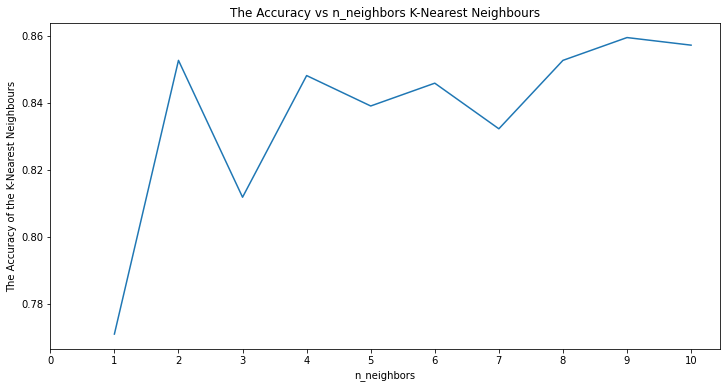

In [ ]:
s =pd.Series()
for i in list(range(1,11)):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_test)
    s = s.append(pd.Series(metrics.accuracy_score(prediction_knn, y_test)))

plt.plot(list(range(1,11)), s)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.title('The Accuracy vs n_neighbors K-Nearest Neighbours')
plt.xlabel('n_neighbors')
plt.ylabel('The Accuracy of the K-Nearest Neighbours')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<br> **---> Random Forest Model**

In [ ]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  2.3min finished


0.8625850340136054
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [ ]:
gd.best_params_

{'n_estimators': 100}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.0

### Predictions

In [ ]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
OutputDF.head()

,Actual Data,Predicted Data
1041,0,0
184,0,0
1222,1,1
67,0,0
220,0,0


### Saving the Model

In [ ]:
import joblib

In [ ]:
joblib.dump(model_svm_l, 'HR_analytics.pkl')

['HR_analytics.pkl']

In [ ]:
# Load the model from the file
model_svm_l_from_joblib = joblib.load('HR_analytics.pkl')

In [ ]:
# Use the loaded model to make predictions
model_svm_l_from_joblib.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,